# Scikit-Learn

- Most popular ML python library.
- Utilises a generalised "estimator API" framework to call the models.
- This means algorithms are imported, fitted and used uniformly across all algos
- Allows us to easily swap algos in and out to test different ones.
- So good that we can apply algos without understanding them.
- Includes heaps of utilities to help us out with ML.

## Philosphy of Scikit-Learn

- Approach to model building focuses on applying models and performance metrics (training + testing)

# Linear Regression With Scikit-Learn

Quick note on what "regression" actually is from wikipedia:

`In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression` - wikipedia

- Essentially regresiion = relationship between X and y

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


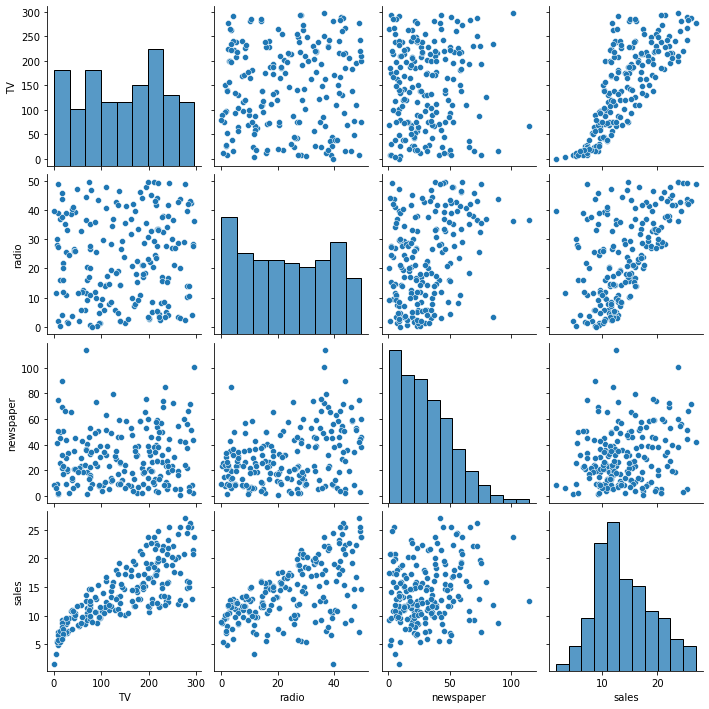

In [4]:
# what is the relationship.
sns.pairplot(df) # we only care about the bottom ones here.

In [5]:
# Split up into features and label.
X = df.drop('sales', axis=1)

In [6]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y = df['sales']

In [8]:
# Train / test split now.
from sklearn.model_selection import train_test_split

In [9]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [10]:
# Tuple destructure the return. use train_test_split()
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30, # Take 30% for test size!
    random_state=42 # Same as seed. (Because the data will be shuffled so that the split is meaningful)
)

In [11]:
len(df)

200

In [12]:
len(X_train) # 70% of data is now in the training set

140

In [15]:
len(X_test) # 30% of the data is now in the testing set.

60

In [16]:
# Create the model (estimator within sklearn)
from sklearn.linear_model import LinearRegression # import our estimator

In [17]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [18]:
mymodel = LinearRegression()

In [19]:
mymodel # Waiting for data to be trained on

LinearRegression()

In [20]:
mymodel.fit(X_train, y_train) # Train the model!!!!

LinearRegression()

In [22]:
# Predict values off the model!!!!
mymodel.predict(X_test) 

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

# But how can we Evaluate Performance?

- We have the known test labels to check our results against.
- We need metrics for continuous values (for regression)
- Mean absolute error, Mean squared error, root mean square error

## Mean Absolute Error (MAE)

- Easiest to understand.
- This is the mean of the absolute value of errors
- BUT it won't punish large errors (like outliers, this is why we would use squares, because outliers would really show)

## Mean Squared Error (MSE)

- Larger errors are punished more than MAE
- When we square errors we really punish the model and will really effect the average of the few points that are off.
- Reports back units of y squared so be careful! (take square root of everything after we are done)

## Root Mean Square Error

- Take the square root of values after doing MSE

- Compare error metric to the average value of the label in your data to get an idea of overall performance.
- Domain knowledge is important.

In [25]:
# Eval on data it has never seen before.
# model.predict(X_test) 
X_test.head()

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [24]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: sales, dtype: float64

In [27]:
# Do the evaluation!
test_preds = mymodel.predict(X_test)
test_preds

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

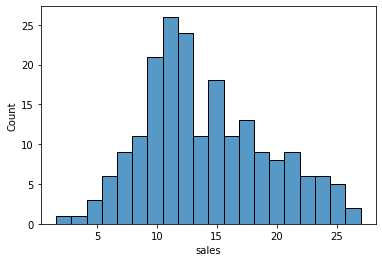

In [31]:
sns.histplot(data=df, x='sales', bins=20)

In [32]:
# Reports back the MAE
# Reports back on how much usually the prediction is off by (1.5 came back and average value is 14 so this is just less than 10% error range)
mean_absolute_error(
    y_test,
    test_preds
)

1.5116692224549084

In [33]:
# MSE
mean_squared_error(
    y_test,
    test_preds
)

3.79679723671522

In [34]:
# RMSE
np.sqrt(mean_squared_error(
    y_test,
    test_preds
))

1.9485372043446387

# Residual Plots

- Often for LR it is a good idea to seperately evaluate residuals (y - y-bar) and not just calc metrics
- We don't want to be seeing ANY patterns in the residual plot, if we do, then there is something strange going on with the data set, the model may not be suitable. (https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/learn/lecture/22976374#overview)

In [35]:
test_residuals = y_test - test_preds

In [37]:
test_residuals # PERFECT model would be all 0, but this is not pragmatic

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: sales, dtype: float64

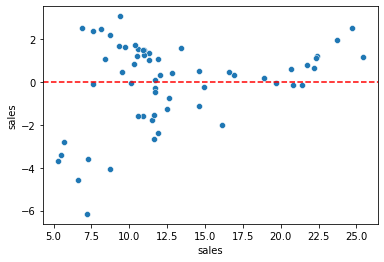

In [39]:
# Can pass data in x and y!
sns.scatterplot(
    x=y_test,
    y=test_residuals
)

plt.axhline(y=0, color='red', ls='--')
# Nice it looks random!

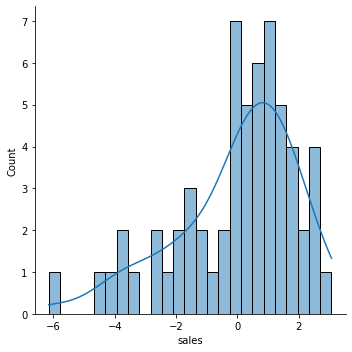

In [41]:
sns.displot(test_residuals, bins=25, kde=True)

In [42]:
import scipy as sp

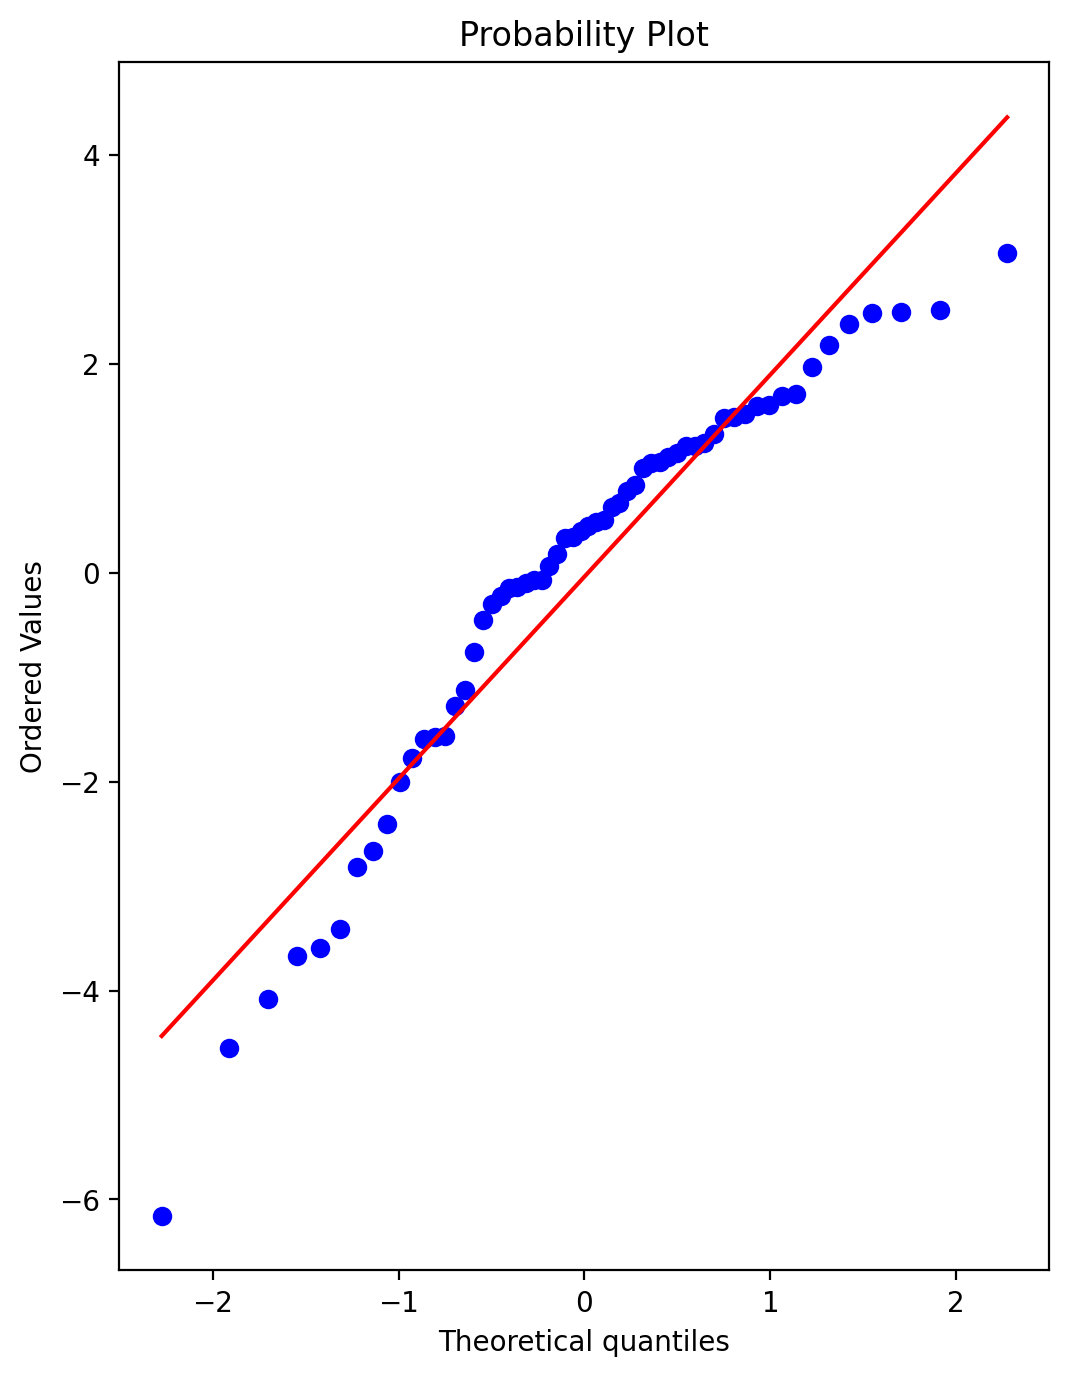

In [44]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=200)

# Shows us the normal distribution vs residual distribution.
# Blue dots should not skew way off the normal distribution.
_ = sp.stats.probplot(test_residuals, plot=ax)

# Model Deployment

- Assuming we were satisfied with the results.

In [45]:
final_model = LinearRegression()

In [46]:
final_model.fit(X, y) # Let's now fit it on all the DATA!

LinearRegression()

In [49]:
# Understanding the coefficients
final_model.coef_ # In same order as the DF of the feature data.

# Coef for newspaper is almost 0, meaning model doesn't think that this effects the result
# Increase in TV of 1 unit = sales of 0.045 unit increase.

array([ 0.04576465,  0.18853002, -0.00103749])

In [50]:
from joblib import dump, load

In [51]:
dump(final_model, 'final_sales_model.joblib') # Save a trained model file!

['final_sales_model.joblib']

In [52]:
# Then you could load it up!
loaded_model = load('final_sales_model.joblib')

In [53]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [54]:
X.shape

(200, 3)

In [55]:
# 149 on TV, 22 on radio and 12 on NP ads.
campaign = [[149, 22, 12]]

In [57]:
# Predict off the model given the shape!!!!
loaded_model.predict(campaign)

array([13.893032])